In [1]:
import numpy as np
from IPython.display import clear_output

import matplotlib.pyplot as plt
import time
import random
from collections import deque
from tqdm import tqdm
import pandas as pd
import copy
import collections

In [2]:
P_0_matrix=np.array([[0.5,0,0,0.5],
                   [0.5,0.5,0,0],
                   [0,0.5,0.5,0],
                   [0,0,0.5,0.5]])


In [3]:
P_1_matrix=P_0_matrix.transpose()

In [4]:
action_space=[0,1]
state_space=[0,1,2,3]
reward_matrix=[[-1,-1],[0,0],[0,0],[1,1]]

In [5]:
def step(state,state_space,action,P_0_matrix,P_1_matrix,reward_matrix):
  if(action==1):
    new_state=np.random.choice(state_space,replace=True,p=P_1_matrix[state])
    reward=reward_matrix[state][1]
  else:
    new_state=np.random.choice(state_space,replace=True,p=P_0_matrix[state])
    reward=reward_matrix[state][0]
  return [new_state,reward]

In [6]:
# temp=[]
# for i in range(100):
#     new_state=np.random.choice(state_space,replace=True,p=P_0_matrix(0.4)[4])
#     temp.append(new_state)

In [7]:
# freq=collections.Counter(temp)
# names = list(freq.keys())
# values = list(freq.values())

# plt.bar(range(len(freq)), values, tick_label=names)

In [8]:
N=40
M=20
epsilon=0.1
arm_indexes=[i for i in range(N)]


In [9]:
def act(Q_values,epsilon,state,arm_index):
  decision=np.random.binomial(n=1,p=epsilon,size=1)
  if decision==1:
    action=random.choice([0,1])
  else:
    action=np.argmax(Q_values[arm_index][state])
  return action

In [10]:
current_state=[random.choice([0,1,2,3]) for _ in range(N)]  


In [11]:
Q1=copy.deepcopy(reward_matrix)
Q2=copy.deepcopy(reward_matrix)
Q3=copy.deepcopy(reward_matrix)
Q4=copy.deepcopy(reward_matrix)

w1=0
w2=0
w3=0
w4=0


In [12]:
w_overtime=[]

In [13]:
rewards=[]
subsidies=[]
action_sums=[]
betas=[]
alphas=[]

In [14]:
current_state

[1,
 3,
 3,
 2,
 2,
 2,
 3,
 0,
 3,
 2,
 0,
 0,
 1,
 3,
 1,
 3,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 0]

In [15]:
for i in range(1,200001):
  action_sum=0
  reward_sum=0
  T=False
  alpha=1/np.ceil(1+i/500)
  # if(i<50000):
  #   beta=0
  # else:
  if i%100==0:
    beta=1/(1+np.ceil((i)*np.log(i)/500))
  else:
    beta=0
  temp=0
  reward=0
  new_state=0
  epsilon=0.1
  whittle_index_arms=[]
  for j in range(N):
    if current_state[j]==0:
      whittle_index_arms.append(w1)
    elif current_state[j]==1:
      whittle_index_arms.append(w2)
    elif current_state[j]==2:
      whittle_index_arms.append(w3)
    
    else:
      whittle_index_arms.append(w4)
      # print(i)
      # print('wohooo')

  # indices_to_pull=get_indices_to_pull(epsilon,whittle_indexes,arm_indexes,M,current_state)
  if random.random()>0.1:
    indices_to_pull = sorted(range(len(whittle_index_arms)), key = lambda j: whittle_index_arms[j])[-M:]
  else:
    indices_to_pull=random.choices(arm_indexes,k=M)
  # print(indices_to_pull)
  # if(i==50000):
  #   print(Q_values)
  #   T=True
  for index in arm_indexes:
      # temp=copy.deepcopy(Q_values)
      if index in indices_to_pull:
        # print(i)
        # print(alpha)
        # print(beta)
        # action=np.argmax(Q_values[index][current_state[index]])
        action=1
        # print(current_state)
        # print(action)

        action_sum+=action
        x=step(current_state[index],state_space,action,P_0_matrix,P_1_matrix,reward_matrix)
        new_state=x[0]
        # print(new_state)
        reward=x[1]
        # print(reward)
        Q1[current_state[index]][action]=(1-alpha)*(Q1[current_state[index]][action])+alpha*(reward+max(Q1[new_state])-(np.array(Q1).sum())/8)
        Q2[current_state[index]][action]=(1-alpha)*(Q2[current_state[index]][action])+alpha*(reward+max(Q2[new_state])-(np.array(Q2).sum())/8)
        Q3[current_state[index]][action]=(1-alpha)*(Q3[current_state[index]][action])+alpha*(reward+max(Q3[new_state])-(np.array(Q3).sum())/8)
        Q4[current_state[index]][action]=(1-alpha)*(Q4[current_state[index]][action])+alpha*(reward+max(Q4[new_state])-(np.array(Q4).sum())/8)


        
        # Q_values=Q_value_update(Q_values,current_state[index],new_state,action,reward,index,whittle_indexes[index][current_state[index]],alpha)
        # print(Q_values)
        # whittle_indexes[index][current_state[index]]+=beta*temp


        # print(whittle_indexes)
        # print("--")
        current_state[index]=new_state
        reward_sum+=reward

        #print(x)
      else:
        # print(i)
        # print(alpha)
        # print(beta)
        # action=np.argmax(Q_values[index][current_state[index]])
        action=0
        # print(current_state)
        # print(action)

        action_sum+=action
        x=step(current_state[index],state_space,action,P_0_matrix,P_1_matrix,reward_matrix)
        new_state=x[0]
        # print(new_state)
        reward=x[1]
        # print(reward)
        Q1[current_state[index]][action]=(1-alpha)*(Q1[current_state[index]][action])+alpha*(reward+w1+max(Q1[new_state])-(np.array(Q1).sum())/8)
        Q2[current_state[index]][action]=(1-alpha)*(Q2[current_state[index]][action])+alpha*(reward+w2+max(Q2[new_state])-(np.array(Q2).sum())/8)
        Q3[current_state[index]][action]=(1-alpha)*(Q3[current_state[index]][action])+alpha*(reward+w3+max(Q3[new_state])-(np.array(Q3).sum())/8)
        Q4[current_state[index]][action]=(1-alpha)*(Q4[current_state[index]][action])+alpha*(reward+w4+max(Q4[new_state])-(np.array(Q4).sum())/8)

        
        # print(Q_values)
        # whittle_indexes[index][current_state[index]]+=beta*temp

        # print(whittle_indexes)
        # print("--")
        current_state[index]=new_state
        reward_sum+=reward

        #print(x)
  # print(i)
  # print(whittle_indexes)
  # print(current_state[index])
  # print(Q_values[index][current_state[index]][1])
  # print(Q_values[index][current_state[index]][0])
  # print((Q_values[index][current_state[index]][1]-Q_values[index][current_state[index]][0]))
  # print('----')
  # whittle_indexes=whittle_indexes_update(whittle_indexes,Q_values,beta,arm_indexes,state_space,T)
  # print(w5)
  # clear_output()

  w1=w1+beta*(Q1[0][1]-Q1[0][0])
  w2=w2+beta*(Q2[1][1]-Q2[1][0])
  w3=w3+beta*(Q3[2][1]-Q3[2][0])
  w4=w4+beta*(Q4[3][1]-Q4[3][0])
  # whittle_indexes_over_time.append(copy.deepcopy(whittle_indexes))
  w_overtime.append([w1,w2,w3,w4])
  # epsilon=epsilon*gamma
  if epsilon<=0.1:
    epsilon=0.1
  rewards.append(reward_sum)
  action_sums.append(action_sum)
  betas.append(beta)
  alphas.append(alpha)








In [16]:
Q2

[[0.5157295582637413, -1.498468518238663],
 [0.014091975920554618, 0.00442144035434228],
 [0.48190271632935705, 1.445583585976134],
 [2.8866217222322095, 2.0410460951772333]]

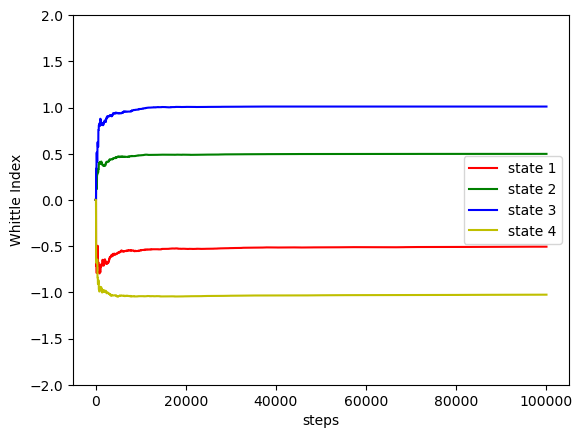

In [17]:
t=100000
j=0
state1=[w_overtime[i][0] for i in range(t)]
state2=[w_overtime[i][1] for i in range(t)]
state3=[w_overtime[i][2] for i in range(t)]
state4=[w_overtime[i][3] for i in range(t)]
plt.figure()
plt.plot(state1,color='r',label='state 1')
plt.plot(state2,color='g',label='state 2')
plt.plot(state3,color='b',label='state 3')
plt.plot(state4,color='y',label='state 4')
plt.legend()
plt.ylabel('Whittle Index')
plt.xlabel('steps')
plt.ylim([-2,2])
plt.show()

In [ ]:
w_overtime[1000000-2]

[-0.3869027072595997,
 -0.057195778327215945,
 0.08344978990660028,
 0.12205520024534984,
 0.07763941281618919]

In [ ]:
beta

1.4870972011343577e-06